In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## Загрузите файл HR.csv в pandas dataframe

In [2]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

Мода для качественных переменных:

In [3]:
print('salary: ', data['salary'].mode()[0])
print('department: ', data['department'].mode()[0])
print('Work_accident: ', data['Work_accident'].mode()[0])
print('left: ', data['left'].mode()[0])
print('promotion_last_5years: ', data['promotion_last_5years'].mode()[0])

salary:  low
department:  sales
Work_accident:  0
left:  0
promotion_last_5years:  0


In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


относительно числовых характеристик:
- mean - среднее значение
- std - среднее отклонение
- min - минимальное значение
- 50% - медиана
- max - максимальное значение

## Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные. 

In [5]:
numeric_data = data[data.columns[:8]]
corr_matrix = numeric_data.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

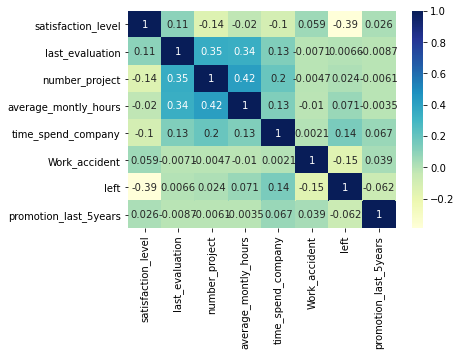

In [6]:
sns.heatmap(corr_matrix, annot = True, cmap ="YlGnBu")

наиболее скоррелированными переменными являются:
- number_project и average_montly_hours (коэффициент корреляции 0.417211)
- last_evaluation и number_project (коэффициент корреляции 0.349333)

наименее скоррелированными переменными являются:
- satisfaction_level и left (коэффициент корреляции -0.388375)
- Work_accident и left (коэффициент корреляции -0.154622)

## Рассчитайте сколько сотрудников работает в каждомдепартаменте. 

In [7]:
for department in data.groupby('department').groups.keys():
    print(department, len(data.groupby('department').groups[department]))

IT 1227
RandD 787
accounting 767
hr 739
management 630
marketing 858
product_mng 902
sales 4140
support 2229
technical 2720


## Показать распределение сотрудников по зарплатам.

In [8]:
for salary in data.groupby('salary').groups.keys():
    print(salary, len(data.groupby('salary').groups[salary]))

high 1237
low 7316
medium 6446


## Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности. 

In [9]:
for element in data.groupby(['department', 'salary']).groups.keys():
    print(element[0], element[1], len(data.groupby(['department', 'salary']).groups[element]))

IT high 83
IT low 609
IT medium 535
RandD high 51
RandD low 364
RandD medium 372
accounting high 74
accounting low 358
accounting medium 335
hr high 45
hr low 335
hr medium 359
management high 225
management low 180
management medium 225
marketing high 80
marketing low 402
marketing medium 376
product_mng high 68
product_mng low 451
product_mng medium 383
sales high 269
sales low 2099
sales medium 1772
support high 141
support low 1146
support medium 942
technical high 201
technical low 1372
technical medium 1147


## Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

Нулевая гипотеза (H0): уровень оклада не влияет на время работы

Альтернативная гипотеза (H1): сотрудники с высоким окладом работают больше сотрудников с меньшим окладом 

In [10]:
alpha = 0.05
high_salary_hours = data[data.salary == 'high']['average_montly_hours']
low_salary_hours = data[data.salary == 'low']['average_montly_hours']
result = st.ttest_ind(high_salary_hours, low_salary_hours)
if result.pvalue < alpha:
    print('сотрудники с высоким окладом работают больше сотрудников с меньшим окладом, принимаем H1')
else:
    print('уровень оклада не влияет на время работы, принимаем H0')

уровень оклада не влияет на время работы, принимаем H0


## Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

### Доля сотрудников с повышением за последние 5 лет.

In [11]:
print('Доля сотрудников не уволившихся за последние 5 лет с повышением: ', 
      round((len(data.groupby(['left', 'promotion_last_5years']).groups[(0, 1)]) / 14999) * 100, 2), '%')
print('Доля сотрудников уволившихся за последние 5 лет с повышением: ', 
      round((len(data.groupby(['left', 'promotion_last_5years']).groups[(1, 1)]) / 14999) * 100, 2), '%')

Доля сотрудников не уволившихся за последние 5 лет с повышением:  2.0 %
Доля сотрудников уволившихся за последние 5 лет с повышением:  0.13 %


### Средняя степень удовлетворенности.

In [12]:
print('Средняя степень удовлетворенности уволившихся сотрудников: ', 
      round(data[data['left'] == 0]['satisfaction_level'].mean()*100, 2),'%')
print('Средняя степень удовлетворенности работающих сотрудников: ',
     round(data[data['left'] == 1]['satisfaction_level'].mean()*100, 2),'%')

Средняя степень удовлетворенности уволившихся сотрудников:  66.68 %
Средняя степень удовлетворенности работающих сотрудников:  44.01 %


### Среднее количество проектов.

In [13]:
print('Среднее количество выполненных проектов уволившихся сотрудников: ',
     data[data['left'] == 0]['number_project'].mean())
print('Среднее количество выполненных проектов работающих сотрудников: ',
     data[data['left'] == 1]['number_project'].mean())

Среднее количество выполненных проектов уволившихся сотрудников:  3.786664333216661
Среднее количество выполненных проектов работающих сотрудников:  3.8555026603192384


## Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [14]:
x = numeric_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
                  'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = numeric_data['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=38)
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
predict = lda.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
accuracy_score(y_test, predict) 

0.7653333333333333

точность модели 77 %